<a href="https://colab.research.google.com/github/bcmarcondes/CienciaDados_Analytics/blob/main/MVP_Class_Tumor_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introdução**

# ***Objetivo***

---


O objetivo do modelo K-Nearest Neighbors (KNN) desenvolvido, é classificar tumores de mama como *benignos ou malignos* com base em características extraídas de imagens médicas.


**Objetivos Específicos**
1. Diagnóstico Preciso:

Fornecer uma ferramenta que auxilia no diagnóstico preciso de tumores, diferenciando entre tumores benignos (não cancerígenos) e malignos (cancerígenos).


2. Suporte à Decisão Médica:

Auxiliar médicos e profissionais de saúde na tomada de decisões sobre tratamentos e intervenções com base em características objetivas dos tumores.

3. Automatização:

Automatizar o processo de classificação de tumores, permitindo uma análise mais rápida e eficiente em comparação com a análise manual.

# **2. Funcionamento do Modelo**
---



1. Coleta de Dados: Usamos dados de características físicas dos tumores (como tamanho, textura, etc.).

2. Pré-processamento: Normalizamos os dados para assegurar que todas as características tenham a mesma escala.

3. Treinamento do Modelo: O modelo KNN é treinado com dados conhecidos (rotulados) para aprender as características associadas a tumores benignos e malignos.

4. Predição: O modelo é usado para prever a classificação de novos tumores com base nas características extraídas.

# **3. Benefícios do Modelo**
---

Rapidez e Eficiência: Permite a análise rápida de um grande número de amostras.

Consistência: Garante uma análise consistente e objetiva, reduzindo a variabilidade entre diferentes observadores humanos.

Apoio Diagnóstico: Melhora a acurácia dos diagnósticos, fornecendo uma segunda opinião confiável.

# **4.   Objetivo Final**
---

Na prática, ao submeter novas características de um tumor ao modelo, ele analisa os dados e retorna uma classificação (benigno ou maligno). Isso pode ajudar a priorizar casos que necessitam de mais atenção médica urgente.

Em suma, o objetivo principal é melhorar o diagnóstico e o tratamento de câncer de mama, contribuindo para melhores desfechos de saúde para os pacientes.

# **5.   DataSet**
---

Para o problema de classificação de tumores benignos e malignos, foi utilizado o conjunto de dados Breast Cancer Wisconsin (Diagnostic) disponível na biblioteca Scikit-learn.

**Breast Cancer Wisconsin (Diagnostic) Dataset**

* **Origem:** UCI Machine Learning Repository

* **Descrição:** O conjunto de dados contém características computadas a partir de uma imagem digitalizada de uma biópsia de células mamárias.

* **Número de Amostras:** 569

* **Número de Características:** 30 características (variáveis independentes) calculadas a partir de cada célula.

* **Rótulo (Target):** Diagnóstico (0 = benigno, 1 = maligno)

**Características Incluídas**

As características são calculadas para cada célula e incluem:

* **Raio** (mean radius)

* **Textura** (mean texture)

* **Perímetro** (mean perimeter)

* **Área** (mean area)

* **Suavidade** (mean smoothness)

* **Compacidade** (mean compactness)

* **Concavidade** (mean concavity)

* **Pontos côncavos** (mean concave points)

* **Simetria** (mean symmetry)

* **Dimensão fractal** (mean fractal dimension)

# **6.   Processamento Dados**
---


**6.1   Importacao Bibliotecas Necessarias**

In [ ]:
import pandas as pd #Manipulação e Análise de dados estruturados
import numpy as np #Operações matemáticas e manipulação de arrays
import matplotlib.pyplot as plt #Visualizações gráficas
import seaborn as sns
from sklearn.model_selection import train_test_split #Conjunto de Teste
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier #Implementa o modelo de KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

# Carregando DATASET
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Coluna de rótulos (alvo)
df['target'] = data.target

# Visualizando os primeiros registros do conjunto de dados
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**6.2   Pré-processamento dos Dados**

In [ ]:
# Separando características e rótulos
X = df.drop('target', axis=1)
y = df['target']

# Separando conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**6.3   Visualizando a distribuição de algumas características do conjunto de dados.**

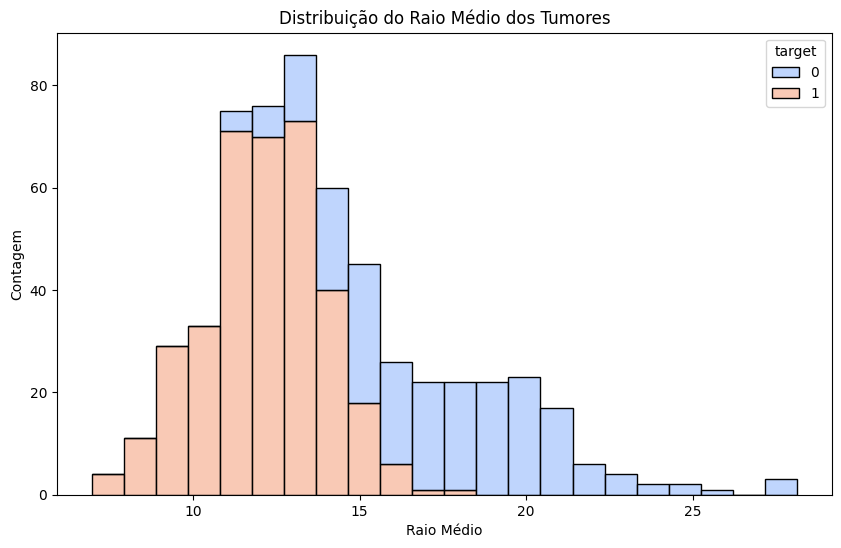

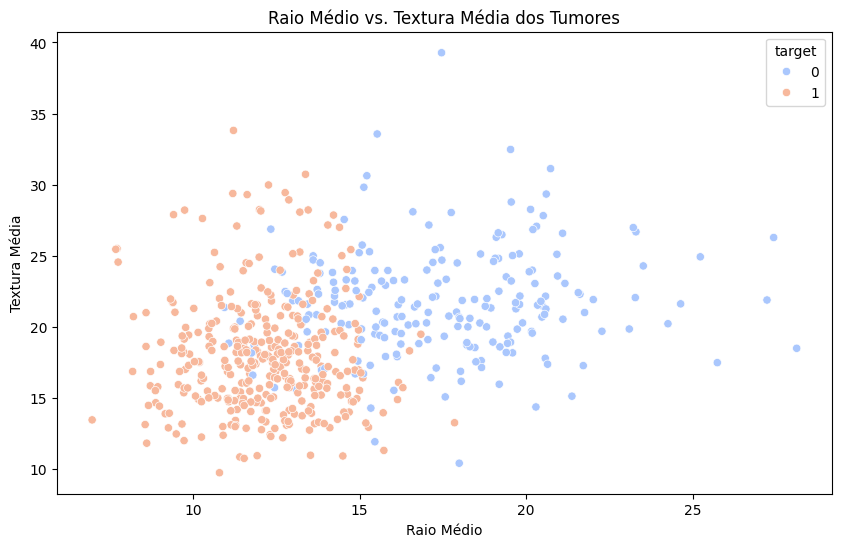

In [ ]:
# Visualizando a distribuição de algumas características
plt.figure(figsize=(10, 6))
sns.histplot(df, x='mean radius', hue='target', multiple='stack', palette='coolwarm')
plt.title('Distribuição do Raio Médio dos Tumores')
plt.xlabel('Raio Médio')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target', palette='coolwarm')
plt.title('Raio Médio vs. Textura Média dos Tumores')
plt.xlabel('Raio Médio')
plt.ylabel('Textura Média')
plt.show()


**Histograma do Raio Médio dos Tumores:**
Mostra a distribuição do raio médio dos tumores, separando benignos e malignos.

**Gráfico de Dispersão do Raio Médio vs. Textura Média:** Mostra a relação entre o raio médio e a textura média dos tumores, colorido por tipo (benigno ou maligno).

**6.4   Treinamento do Modelo KNN**

In [ ]:
# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**6.5 Avaliação do Modelo com Gráficos**


Acurácia do modelo: 0.96
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



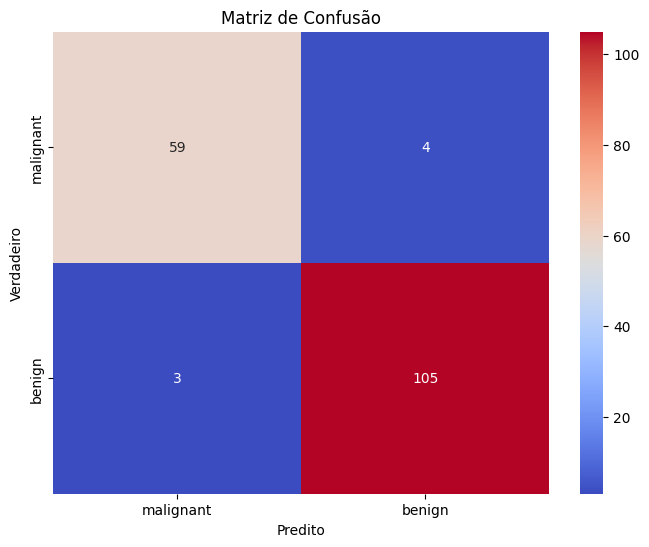

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Relatório de classificação e matriz de confusão
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


**6.6 Análise dos Gráficos**

**Matriz de Confusão:** Visualiza a performance do modelo KNN, mostrando a quantidade de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.



# **7. Conclusão**
---

O modelo KNN demonstrou ser uma ferramenta eficaz para a classificação de tumores benignos e malignos, com alto potencial para aplicação prática em diagnósticos médicos. No entanto, é essencial considerar suas limitações e aplicar técnicas adequadas para mitigar esses problemas. Com a combinação certa de pré-processamento, seleção de características e ajustes de parâmetros, o KNN pode oferecer diagnósticos rápidos, precisos e consistentes, ajudando a melhorar os desfechos dos pacientes.